In [33]:
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

X, y = geradataset(20)
X, y

(array([[0.06342359, 0.58276587],
        [0.70399786, 0.95006977],
        [0.65053759, 0.43035539],
        [0.85892963, 0.77288258],
        [0.57820596, 0.6027501 ],
        [0.25294168, 0.61633326],
        [0.36360114, 0.46342468],
        [0.06438771, 0.47980633],
        [0.87850175, 0.30119668],
        [0.85222293, 0.70569879],
        [0.54602195, 0.61215892],
        [0.03565551, 0.89277881],
        [0.3660262 , 0.75547103],
        [0.85135965, 0.20137663],
        [0.18390066, 0.24674872],
        [0.62391242, 0.55956102],
        [0.55035265, 0.39180587],
        [0.74437305, 0.23179272],
        [0.38592266, 0.38602548],
        [0.35015124, 0.6577168 ]]),
 array([-1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,
         1, -1, -1]))

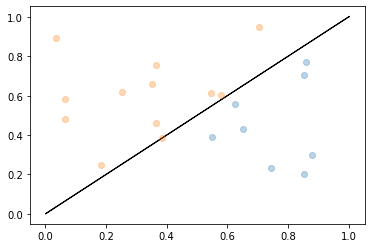

In [34]:
import matplotlib.pyplot as plt

def plotadataset(X, y):
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotadataset(X, y)

def plotavetor(vetor, cor="k"):
    origem = [0,0]
    plt.arrow(*origem, *vetor, color=cor)

hiperplano = [1, -1]

def perpendicular(hiperplano):
    perp = np.array(hiperplano[::-1])
    perp[0] *= -1
    return perp

vetor = perpendicular(hiperplano)

plotavetor(vetor)

In [40]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.1
        self.maxiter = 100
    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=2)
        for _ in range(self.maxiter):
            ypred = self.predict(X)
            erro = y - ypred
            custo = np.sum(erro**2)
            self.w = self.w + self.alpha*np.matmul(erro, X)
            if custo==0:
                break

    def predict(self, X):
        a = np.matmul(X, self.w)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
sum(y == ypred)/len(y)

1.0

0.993
[ 0.80076526 -0.8143597 ]


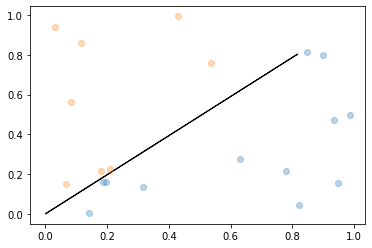

In [101]:
X, y = geradataset(20)
perceptron.fit(X, y)
ypred = perceptron.predict(Xte)
print(sum(yte == ypred)/len(yte))

plotadataset(X, y)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

0.991
[ 0.80076526 -0.8143597 ]


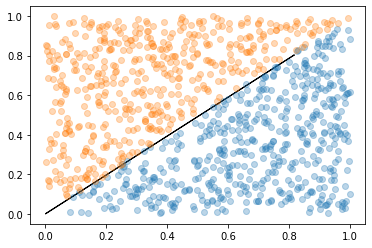

In [106]:
Xte, yte = geradataset(1000)
ypred = perceptron.predict(Xte)
print(sum(yte == ypred)/len(yte))

plotadataset(Xte, yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))